## Run the Self-Organizing Map
___

First, load the data

In [1]:
from astropy.io import fits
from astropy.table import Table

import numpy as np

In [2]:
#Load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [3]:
#Select the needed data
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_stds = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

___

Initialize the SOM

In [5]:
from mpdg_som import SelfOrganizingMap

In [14]:
#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [12, 12] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'error_thresh' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold.
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = 'quantization_error' #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.75 #used to adjust the learning rate function
maximum_steps = 25 #used to adjust the learning rate and neighborhood functions
error_thresh  = 0.05 #used to stop the SOM if termination = 'error thresh'

In [19]:
#Declare the SOM
SOM = SelfOrganizingMap(
    name                   = name,
    mapsize                = mapsize,
    dimension              = dimension,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    error_estimator        = error_estimator,
    learning_rate          = learning_rate,
    maximum_steps          = maximum_steps,
    error_thresh           = error_thresh
)

In [21]:
data_cut = 2880 #use up to this much of the data
randomized_idx = np.arange(0, len(input_data))
np.random.shuffle(randomized_idx)
randomized_idx = randomized_idx[:data_cut]

SOM.load_data(input_data[randomized_idx],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.normalize_data()

SOM.load_standard_deviations(input_stds[randomized_idx])
SOM.normalize_standard_deviations()

SOM.data_statistics()

| Data statistics 
stat	r_mag	gr_color	surf_bright_r	
min	0.000	0.000	0.000	
max	1.000	1.000	1.000	
mean	0.798	0.703	0.437	
median	0.818	0.714	0.435	
std	0.094	0.122	0.130	

In [22]:
#Initialize the SOM
SOM.build_SOM()


| SOM. Step 0. Initialization: pca


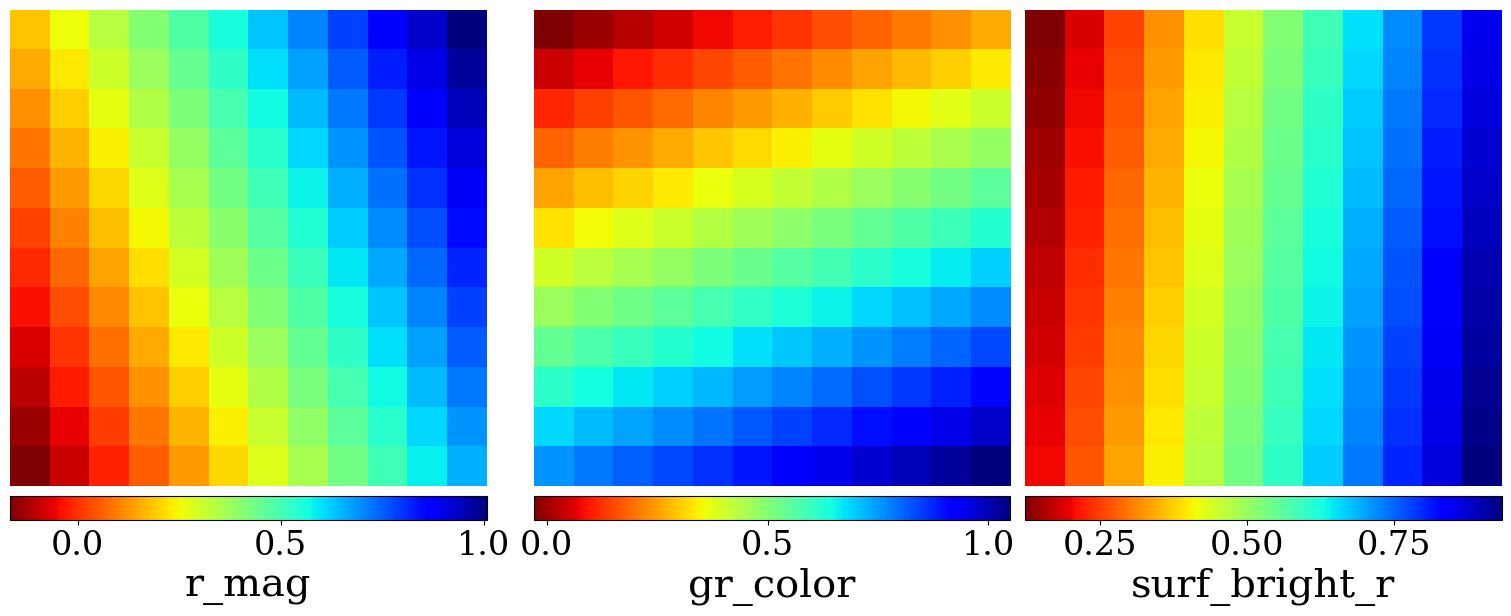

In [23]:
#Visualize SOM before training
SOM.show_map()

In [24]:
#Train the som
SOM.train()

Step 1 complete. Error: 0.153
Step 2 complete. Error: 0.166
Step 3 complete. Error: 0.169
Step 4 complete. Error: 0.170
Step 5 complete. Error: 0.153
Step 6 complete. Error: 0.166
Step 7 complete. Error: 0.180
Step 8 complete. Error: 0.163
Step 9 complete. Error: 0.183
Step 10 complete. Error: 0.171
Step 11 complete. Error: 0.172
Step 12 complete. Error: 0.171
Step 13 complete. Error: 0.160
Step 14 complete. Error: 0.159
Step 15 complete. Error: 0.162
Step 16 complete. Error: 0.161
Step 17 complete. Error: 0.154
Step 18 complete. Error: 0.192
Step 19 complete. Error: 0.164
Step 20 complete. Error: 0.171
Step 21 complete. Error: 0.149
Step 22 complete. Error: 0.154
Step 23 complete. Error: 0.174
Step 24 complete. Error: 0.159
Step 25 complete. Error: 0.165
Step 26 complete. Error: 0.163
Step 27 complete. Error: 0.154
Step 28 complete. Error: 0.143
Step 29 complete. Error: 0.147
Step 30 complete. Error: 0.161
Step 31 complete. Error: 0.167
Step 32 complete. Error: 0.165
Step 33 complete.

KeyboardInterrupt: 


| SOM. Step 83. Initialization: pca


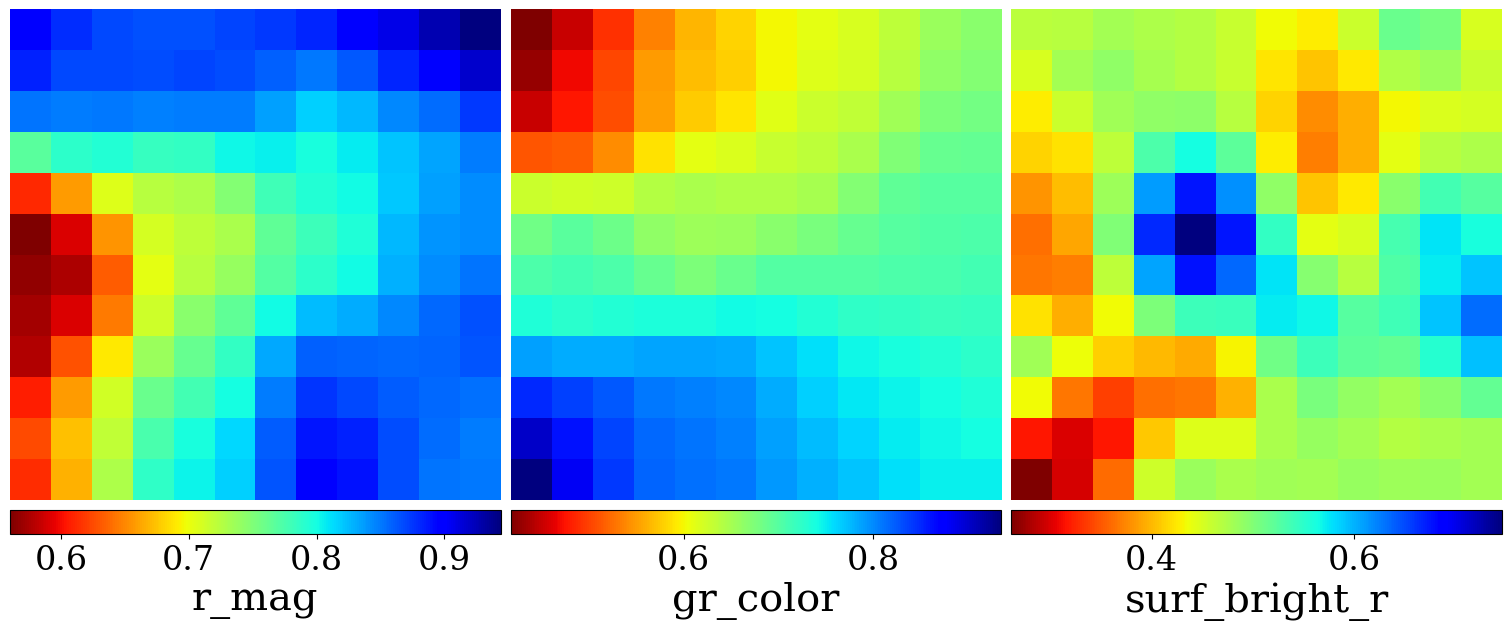

In [25]:
#Visualize the SOM after training
SOM.show_map()


| SOM. Step 83. Initialization: pca


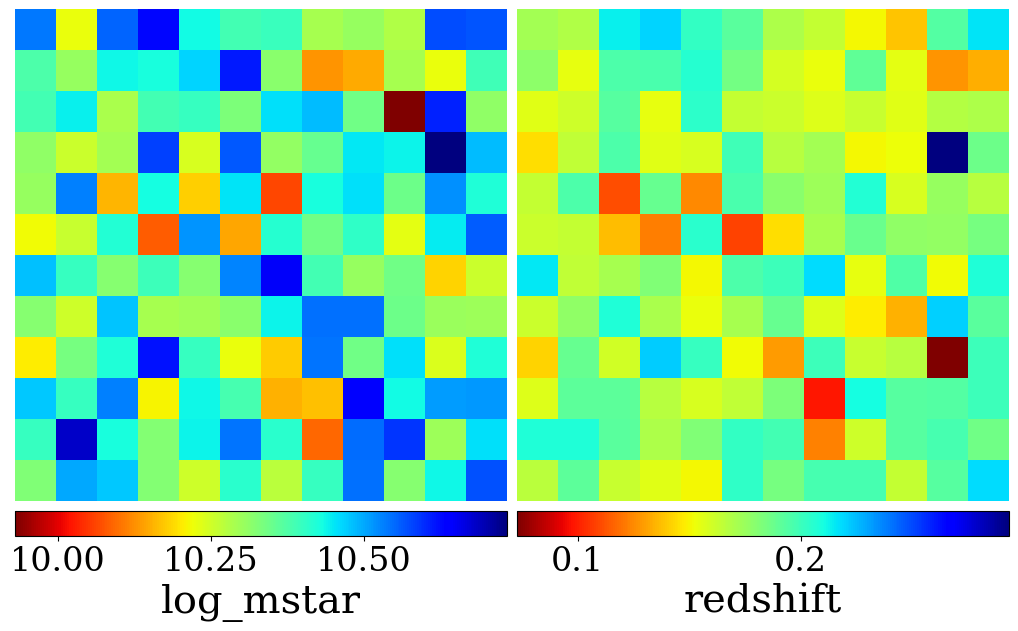

In [26]:
#Label the cells in the map with external parameters. Visualize the labeled map.
SOM.label_map(input_labels[:data_cut],
              parameter_names = ['log_mstar', 'redshift'])
SOM.show_map(show_labeled = True)

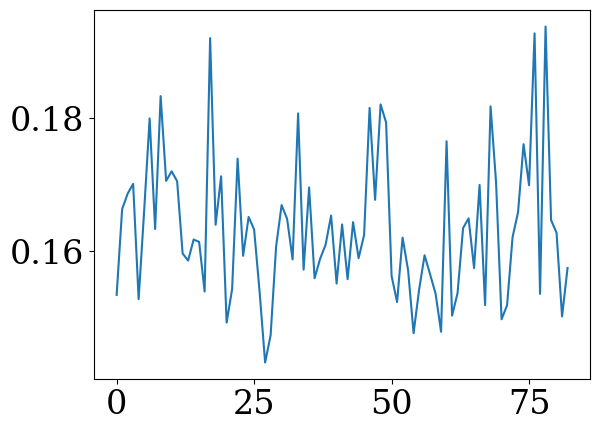

In [27]:
import matplotlib.pyplot as plt
plt.plot(SOM.errors)

In [ ]:
SOM.predict(SOM.data)

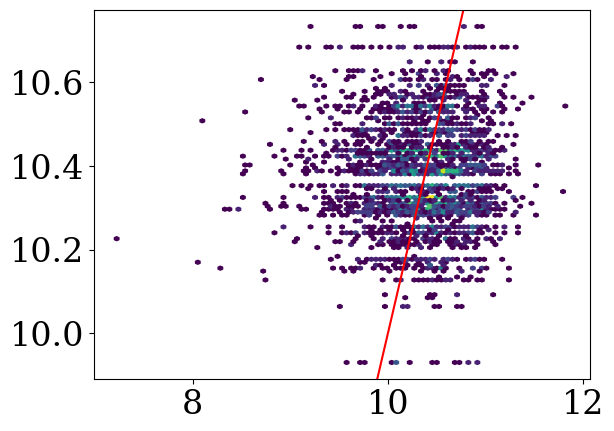

In [32]:
plt.hexbin(SOM.parameters[:, 0],
           SOM.prediction_results[:, 0],
           mincnt = 1)
plt.axline([10, 10], slope = 1, color = 'red')

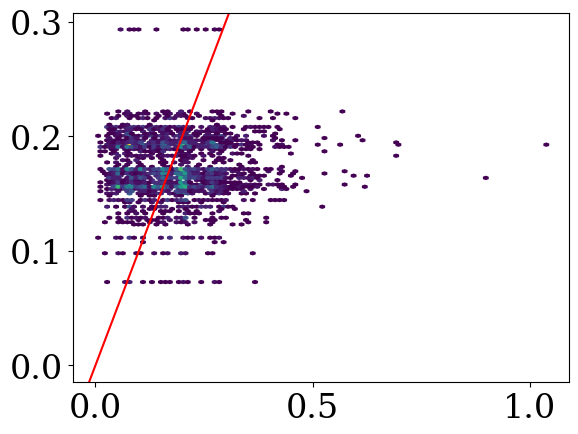

In [33]:
plt.hexbin(SOM.parameters[:, 1],
           SOM.prediction_results[:, 1],
           mincnt = 1)
plt.axline([0, 0], slope = 1, color = 'red')